In [1]:
import os
import json
import rasterio
import numpy as np
from matplotlib import pyplot as plt
import csv
import rasterio.mask
import pandas as pd

In [3]:
import os
path = 'dmspols'

imagefiles = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if 'web.stable_lights.avg_vis.tif' in file:
            imagefiles.append(os.path.join(r, file))
        


In [3]:
path = 'json_files/'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
            files.append(os.path.join(r, file))
for f in files:
    print(f)
    data=json.load(open(f))


json_files/brazil.json
json_files/canada.json
json_files/china.json
json_files/france.json
json_files/germany.json
json_files/india.json
json_files/indonesia.json
json_files/iran.json
json_files/italy.json
json_files/japan.json
json_files/korea.json
json_files/mexico.json
json_files/russia.json
json_files/saudiarab.json
json_files/spain.json
json_files/turkey.json
json_files/uk.json
json_files/usa.json


In [5]:
for f in files:
    s=f[11:len(f)-5]
    print(s)

brazil
canada
china
france
germany
india
indonesia
iran
italy
japan
korea
mexico
russia
saudiarab
spain
turkey
uk
usa


In [10]:
data=json.load(open("json_files/brazil.json"))
geom=[data['geometry']]

with rasterio.open('SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif') as src:
        out_image,out_transform = rasterio.mask.mask(src, geom)
raster_arrayb=out_image[0]
print(raster_arrayb.min())
print(raster_arrayb.max())

0.0
0.0


In [11]:
data=json.load(open("json_files/japan.json"))
geom=[data['geometry']]

with rasterio.open('SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif') as src:
        out_imageind,out_transform = rasterio.mask.mask(src, geom, all_touched=True)
raster_arrayb=out_image[0]
print(raster_arrayb.min())
print(raster_arrayb.max())   

0.0
0.0


In [7]:
def raster_array(geom,img):
        sum1=0
        sum2=0
    
        with rasterio.open(img) as src:
            out_image,out_transform = rasterio.mask.mask(src, geom, all_touched=True, nodata=0.0,crop=True)
        raster_array=out_image[0]   
        
        
        for row in range (len(raster_array)):
             for col in range(len(raster_array[0])):
                    if(raster_array[row][col]<0.0):
                        raster_array[row][col]=0.0
                    sum1 = sum1 + raster_array[row][col]
                    
                    
        return (sum1)

In [6]:
with open('nightlightsdmsp.csv','w', newline='') as f1:
    thewriter=csv.writer(f1)
    for vf in imagefiles:
        for f in files:
            data=json.load(open(f))
            geom=[data['geometry']]
            country= f[11:len(f)-5]
            if 'rade9h.tif' in vf:
                time= vf[48:54]
        
            else if 'avg_lights_x_pct.tif' in vf:
                time= vf[23:27]
                   
        
            thewriter.writerow([time,country,raster_array(geom,vf)])

C:\Users\Public\anaconda\lib\site-packages\rasterio\mask.py:89: UserWarning: shapes are outside bounds of raster. Are they in different coordinate reference systems?
  warnings.warn('shapes are outside bounds of raster. '


In [3]:
data=json.load(open("json_files/mexico.json"))
geom=[data['geometry']]

with rasterio.open('F101992.v4b_web.stable_lights.avg_vis.tif') as src:
        out_image,out_transform = rasterio.mask.mask(src, geom)
raster_arrayb=out_image[0]

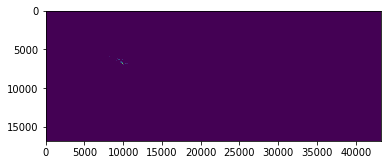

In [5]:
plt.imshow(out_image[0])

In [6]:
data=json.load(open("json_files/usa.json"))
geom=[data['geometry']]

with rasterio.open('F101992.v4b_web.stable_lights.avg_vis.tif') as src:
        out_image,out_transform = rasterio.mask.mask(src, geom)
raster_arrayb=out_image[0]

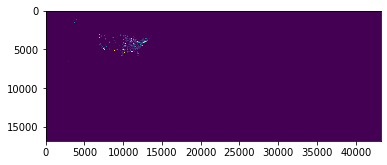

In [7]:
plt.imshow(out_image[0])

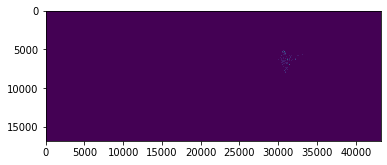

In [9]:
data=json.load(open("json_files/india.json"))
geom=[data['geometry']]

with rasterio.open('F101992.v4b_web.stable_lights.avg_vis.tif') as src:
        out_image,out_transform = rasterio.mask.mask(src, geom)
raster_arrayb=out_image[0]
plt.imshow(out_image[0],vmin=0,vmax=1)

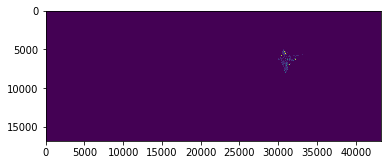

In [11]:
data=json.load(open("json_files/india.json"))
geom=[data['geometry']]

with rasterio.open('F182013.v4c_web.stable_lights.avg_vis.tif') as src:
        out_image,out_transform = rasterio.mask.mask(src, geom)
raster_arrayb=out_image[0]
plt.imshow(out_image[0])

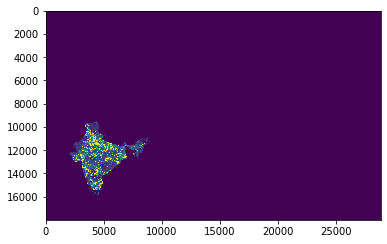

In [5]:
data=json.load(open("json_files/india.json"))
geom=[data['geometry']]

with rasterio.open('SVDNB_npp_20120401-20120430_75N060E_vcmcfg_v10_c201605121456.avg_rade9h.tif') as src:
        out_image,out_transform = rasterio.mask.mask(src, geom)
raster_arrayb=out_image[0]
plt.imshow(out_image[0],vmin=0,vmax=1)